In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

X = mnist.data
y = mnist.target


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Finding the best value of K.

In [3]:
best_accuracy=0
j=0
for i in range(2,11):
      # Splitting dataset into training and testing sets
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

      # Creating a KNN classifier with k=i
      knn_classifier = KNeighborsClassifier(n_neighbors=i)

      # Training the classifier on the training data
      knn_classifier.fit(X_train, y_train)

      # Predict the labels for the test data
      y_pred = knn_classifier.predict(X_test)

      # Calculate the accuracy of the model
      accuracy = accuracy_score(y_test, y_pred)
      print("Accuracy for k=: {}     ".format(i), accuracy)

      #Find K with maximum accuracy

      if accuracy> best_accuracy:
        best_accuracy=accuracy
        j=i



Accuracy for k=: 2      0.9628095238095238
Accuracy for k=: 3      0.9694285714285714
Accuracy for k=: 4      0.9678571428571429
Accuracy for k=: 5      0.9681428571428572
Accuracy for k=: 6      0.9667619047619047
Accuracy for k=: 7      0.9674285714285714
Accuracy for k=: 8      0.9655238095238096
Accuracy for k=: 9      0.9652857142857143
Accuracy for k=: 10      0.963952380952381


Reporting the Accuracy

In [4]:
print("The Best accuracy is {} and corresponding K={}".format(best_accuracy,j))

The Best accuracy is 0.9694285714285714 and corresponding K=3


Displaying results by showing the image, actual label, and predicted label.

859


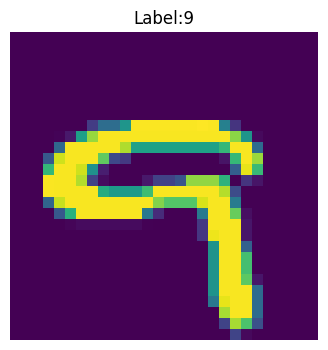

In [5]:
#Considering K=3 since it has maximum accuracy
knn_classifier = KNeighborsClassifier(n_neighbors=j)

# Training the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Predicting the labels for the test data
y_pred = knn_classifier.predict(X_test)

y_test=np.array(y_test)

import matplotlib.pyplot as plt

#Randomly pick an index
random_index = np.random.randint(0, len(X_test))
print(random_index)
X_test=np.array(X_test)
# Get the image data and label
image = X_test[random_index,:].reshape(28,28)
label = y_pred[random_index]

# Display the image
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title("Label:{}".format(label))
plt.axis('off')
plt.show()


Displaying some samples where it has been predicted incorrectly

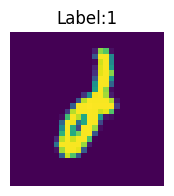

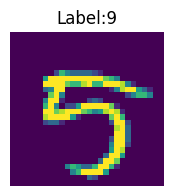

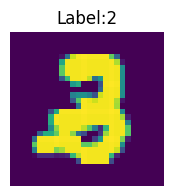

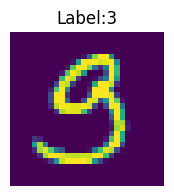

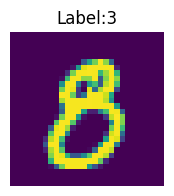

In [7]:
for index in range(0, len(X_test)):
  import matplotlib.pyplot as plt
  image = X_test[index,:].reshape(28,28)
  label = y_pred[index]

  if y_test[index]!=label:
    if index<=200:
      plt.figure(figsize=(2, 2))
      plt.imshow(X_test[index,:].reshape(28,28))
      plt.title("Label:{}".format(label))
      plt.axis('off')
      plt.show()
    else:
      break